In [29]:
import json
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from collections import defaultdict
import math

In [30]:
with open('../data/ddg.json') as file:
    file_contents = file.read()
    ddg_dict = json.loads(file_contents)

with open('../data/ddg_err.json') as file:
    file_contents = file.read()
    ddg_err_dict = json.loads(file_contents)


with open('../data/conv.json') as file:
    conv_dict = json.load(file)

with open('../data/conv_std.json') as file:
    conv_std_dict = json.load(file)

In [31]:
ddg_sum = defaultdict()
dg_err_vac_sum = defaultdict()
dg_err_wat_sum = defaultdict()
ddg_err_sum = defaultdict()
conv_vac_sum = defaultdict()
conv_wat_sum = defaultdict()

for key, value in ddg_dict.items():
    if key[-3] not in ddg_sum:
        ddg_sum[key[-3]] = {'0': {}, '1': {}, '2': {}}
    if "B" in key.split("_")[-1]:
        ddg_sum[key[-3]]['0']['P'] = value
        ddg_sum[key[-3]]['0']['Abbrev_P'] = f'{key[-3]}PA->{key[-3]}PB'
    else:
        if 'I' not in ddg_sum[key[-3]][key[-1]]:
            if key[-5] == "A":
                ddg_sum[key[-3]][key[-1]]['I'] = value
            else:
                ddg_sum[key[-3]][key[-1]]['I'] = -value
        else:
            if key[-5] == "A":
                ddg_sum[key[-3]][key[-1]]['I'] += value
            else:
                ddg_sum[key[-3]][key[-1]]['I'] += -value
        ddg_sum[key[-3]][str(
            int(key[-1])
        )]['Abbrev_I'] = f'{key[-3]}I{str(int(key[-1]))}'

for key, value in ddg_err_dict.items():
    if key[-3] not in ddg_err_sum:
        ddg_err_sum[key[-3]] = {'0':{}, '1':{}, '2':{}}
    if "B" in key.split("_")[-1]:
        ddg_err_sum[key[-3]]['0']['P'] = value
    else:
        if 'I' not in ddg_err_sum[key[-3]][key[-1]]:
            ddg_err_sum[key[-3]][key[-1]]['I'] = value
        else:
            ddg_err_sum[key[-3]][key[-1]]['I'] = math.sqrt(ddg_err_sum[key[-3]][key[-1]]['I']**2 + value**2)

for key, value in conv_dict.items():
    if key[-3] not in conv_vac_sum:
        conv_vac_sum[key[-3]] = {'0': {}, '1': {}, '2': {}, '3': {}}
        conv_wat_sum[key[-3]] = {'0': {}, '1': {}, '2': {}, '3': {}}
    if "B" in key.split("_")[-1]:
        conv_vac_sum[key[-3]]['0']['Conv_P'] = value['vacuum']
        conv_wat_sum[key[-3]]['0']['Conv_P'] = value['water']
        conv_vac_sum[key[-3]]['0']['Conv_std_P'] = conv_std_dict[key]['vacuum']
        conv_wat_sum[key[-3]]['0']['Conv_std_P'] = conv_std_dict[key]['water']
    else:
        if 'Conv_I' not in conv_vac_sum[key[-3]][str(int(key[-1]))]:
            conv_vac_sum[key[-3]][str(int(key[-1]))]['Conv_I'] = value['vacuum']
            conv_wat_sum[key[-3]][str(int(key[-1]))]['Conv_I'] = value['water']
            conv_vac_sum[key[-3]][str(
                int(key[-1]))]['Conv_std_I'] = conv_std_dict[key]['vacuum']
            conv_wat_sum[key[-3]][str(
                int(key[-1]))]['Conv_std_I'] = conv_std_dict[key]['water']
        else:
            conv_vac_sum[key[-3]][str(int(key[-1]))]['Conv_I'] += value['vacuum']
            conv_wat_sum[key[-3]][str(int(key[-1]))]['Conv_I'] += value['water']
            conv_vac_sum[key[-3]][str(int(key[-1]))]['Conv_std_I'] = math.sqrt(conv_std_dict[key]['vacuum']**2 + conv_vac_sum[key[-3]][str(int(key[-1]))]['Conv_std_I']**2)
            conv_wat_sum[key[-3]][str(int(key[-1]))]['Conv_std_I'] = math.sqrt(conv_std_dict[key]['water']**2 + conv_wat_sum[key[-3]][str(int(key[-1]))]['Conv_std_I']**2)

In [32]:
conv_vac_sum

defaultdict(None,
            {'1': {'0': {'Conv_P': 30.0,
               'Conv_std_P': 12.027745701779143,
               'Conv_I': 37.33333333333333,
               'Conv_std_I': 6.798692684790379},
              '1': {'Conv_I': 59.0, 'Conv_std_I': 4.521553322083513},
              '2': {},
              '3': {}},
             '2': {'0': {'Conv_P': 56.333333333333336,
               'Conv_std_P': 13.816254517375139,
               'Conv_I': 89.66666666666667,
               'Conv_std_I': 4.136557881996953},
              '1': {'Conv_I': 32.0, 'Conv_std_I': 13.131810402394805},
              '2': {},
              '3': {}},
             '3': {'0': {'Conv_P': 37.0,
               'Conv_std_P': 12.96148139681572,
               'Conv_I': 49.0,
               'Conv_std_I': 8.894442709417556},
              '1': {'Conv_I': 40.33333333333333,
               'Conv_std_I': 12.009255689767881},
              '2': {},
              '3': {}},
             '4': {'0': {'Conv_P': 47.0,
           

In [33]:
df_ddg = pd.DataFrame.from_dict({(i,j): ddg_sum[i][j] 
                           for i in ddg_sum.keys() 
                           for j in ddg_sum[i].keys()},
                       orient='index')

df_ddg_err = pd.DataFrame.from_dict({(i,j): ddg_err_sum[i][j] 
                           for i in ddg_sum.keys() 
                           for j in ddg_sum[i].keys()},
                       orient='index').add_suffix('_std')

df_conv_vac = pd.DataFrame.from_dict({(i,j): conv_vac_sum[i][j] 
                           for i in ddg_sum.keys() 
                           for j in ddg_sum[i].keys()},
                       orient='index').add_suffix('_vac')

df_conv_wat = pd.DataFrame.from_dict({(i,j): conv_wat_sum[i][j] 
                           for i in ddg_sum.keys() 
                           for j in ddg_sum[i].keys()},
                       orient='index').add_suffix('_wat')

In [34]:
df = df_ddg.join([df_conv_vac, df_conv_wat]) 

In [35]:
df

,,P,Abbrev_P,I,Abbrev_I,Conv_P_vac,Conv_std_P_vac,Conv_I_vac,Conv_std_I_vac,Conv_P_wat,Conv_std_P_wat,Conv_I_wat,Conv_std_I_wat
1,0,-1.623535,1PA->1PB,-1.852958,1I0,30.000000,12.027746,37.333333,6.798693,53.000000,15.641824,50.333333,11.498792
2,0,-2.581551,2PA->2PB,-2.034899,2I0,56.333333,13.816255,89.666667,4.136558,66.333333,12.256518,69.333333,23.199617
3,0,-3.980015,3PA->3PB,-3.236625,3I0,37.000000,12.961481,49.000000,8.894443,41.333333,6.342099,65.333333,9.043107
4,0,-2.111657,4PA->4PB,-1.724930,4I0,47.000000,19.866219,54.666667,13.792107,66.000000,12.727922,56.000000,15.114379
5,0,1.305358,5PA->5PB,1.475154,5I0,8.000000,2.828427,14.000000,5.537749,29.000000,8.286535,38.666667,19.402176
6,0,-1.699983,6PA->6PB,-1.853669,6I0,61.000000,19.798990,71.666667,26.195844,55.000000,15.253415,77.000000,23.295207
7,0,2.386720,7PA->7PB,1.687748,7I0,47.666667,20.401525,50.666667,10.370899,50.666667,17.441967,58.333333,12.560962
1,1,NaN,NaN,-1.837182,1I1,NaN,NaN,59.000000,4.521553,NaN,NaN,53.666667,19.142739
2,1,NaN,NaN,-2.381044,2I1,NaN,NaN,32.000000,13.131810,NaN,NaN,69.666667,25.686140
3,1,NaN,NaN,-2.965894,3I1,NaN,NaN,40.333333,12.009256,NaN,NaN,85.333333,11.065462


In [36]:
df['Conv_P_vac'] = df['Conv_P_vac'] / 10
df['Conv_P_wat'] = df['Conv_P_wat'] / 10

df['Conv_std_P_vac'] = df['Conv_std_P_vac'] / 10
df['Conv_std_P_wat'] = df['Conv_std_P_wat'] / 10

df['Conv_I_vac'] = df['Conv_I_vac'] / 10
df['Conv_I_wat'] = df['Conv_I_wat'] / 10

df['Conv_std_I_vac'] = df['Conv_std_I_vac'] / 10
df['Conv_std_I_wat'] = df['Conv_std_I_wat'] / 10

df = df.round(decimals=1)

In [37]:
df['Conv_P_sum'] = df['Conv_P_vac'] + df['Conv_P_wat']
df['Conv_I_sum'] = df['Conv_I_vac'] + df['Conv_I_wat']

In [38]:
np.arange(float(max(df.index)[0])) 

array([0., 1., 2., 3., 4., 5., 6.])

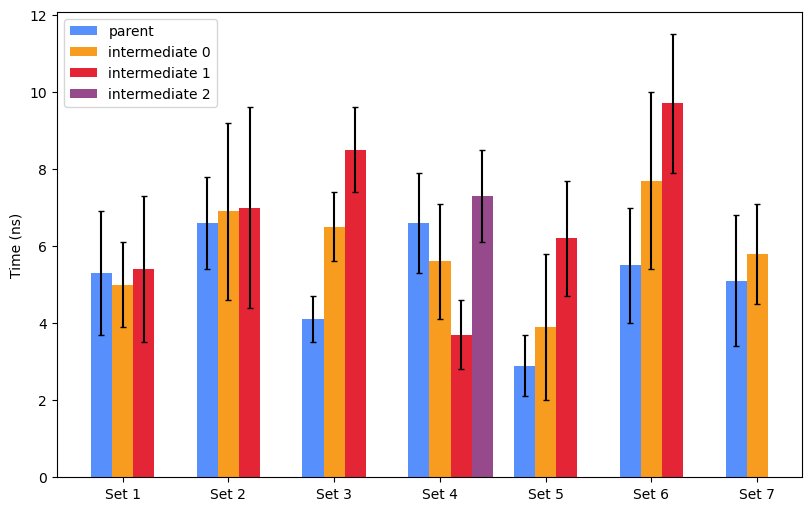

In [63]:
fig, ax = plt.subplots(layout='constrained', figsize=(8,5))

x = np.arange(float(max(df.index)[0]))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0
colors = ["#5790fc", "#f89c20", "#e42536", "#964a8b", "#9c9ca1", "#7a21dd"]

for i, (values, stds) in enumerate([('Conv_P_wat', 'Conv_std_P_wat'), ('Conv_I_wat', 'Conv_std_I_wat'), ('Conv_I_wat', 'Conv_std_I_wat'), ('Conv_I_wat', 'Conv_std_I_wat')]):
    n = i
    if values == "Conv_I_wat":
        n = i - 1
    offset = width * multiplier
    x = np.array([float(x) for x in df.loc(axis=0)[:, str(n)].index.get_level_values(0)])
    rects = ax.bar(x + offset, df.loc(axis=0)[:, str(n)][values].values, width, yerr=df.loc(axis=0)[:, str(n)][stds].values, label=values, capsize=2, color=colors[i])
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time (ns)')
x = np.arange(1, float(max(df.index)[0])+1) 
ax.set_xticks(x + width, [f'Set {str(int(y))}' for y in x])#, ['LOMAP', 'ROCS', "Tanimoto"])
ax.legend(loc='upper left', labels=["parent", "intermediate 0", "intermediate 1", 'intermediate 2'])
# ax.set_ylim(0, 1)
# ax.set_xticks([])

plt.show()

In [40]:
x

array([1., 2., 3., 4., 5., 6., 7.])